<a href="https://colab.research.google.com/github/KCachel/FairRankTune/blob/main/examples/2_ranktune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Setup

We need to install [FairRankTune](https://https://github.com/KCachel/FairRankTune).

In [1]:
!pip install FairRankTune

We need to import FairRankTune along with some other packages.

In [2]:
import FairRankTune as frt
import numpy as np
import pandas as pd
from FairRankTune import RankTune, Metrics, Rankers
import matplotlib.pyplot as plt

# RankTune (Data Generation)
The [RankTune](https://https://kcachel.github.io/FairRankTune/RankTune/) data generator allows for quickly generating high-volumes of unfair rankings.

RankTune is a pseudo-stochastic data generation method for creating fairness-aware ranked lists using the fairness concept of statistical parity. Inlcuded in the `RankTune` module, it creates ranking(s) based on the `phi` representativeness parameter. When `phi = 0` then the generated ranked list(s) does not represent groups fairly, and as `phi` increases groups are represented more and more fairly; thus `phi = 1` groups are fairly represented. RankTune uses a [pseudo-random process](https://kcachel.github.io/FairRankTune/RankTune/#how-does-it-work) to generate fairness-aware ranked data. RankTune can generate ranked data from [user provided group sizes](https://kcachel.github.io/FairRankTune/RankTune/#using-group-sizes), from [existing datasets](https://kcachel.github.io/FairRankTune/RankTune/#using-an-existing-dataset), along with [producing relevance scores](https://kcachel.github.io/FairRankTune/RankTune/#generating-scores-with-the-ranking) accompanying the ranked list(s).

## RankTune data generation from provided group sizes
RankTune can be used to generate ranking(s) from `group_proportions`, a numpy array with each group's proportion of the total items, `num_items`, by using the `GenFromGroups()` function.

Here we are going to demonstrate the behavior of RankTune by showing how the genreated rankings changes as the parameter `phi` is adjusted from `phi = 0` (unfair representation of groups) to `phi = 1` (fair representation of groups). We will generate ranking(s) with different `phi` values and measure there fairness with five statistical parity metrics.

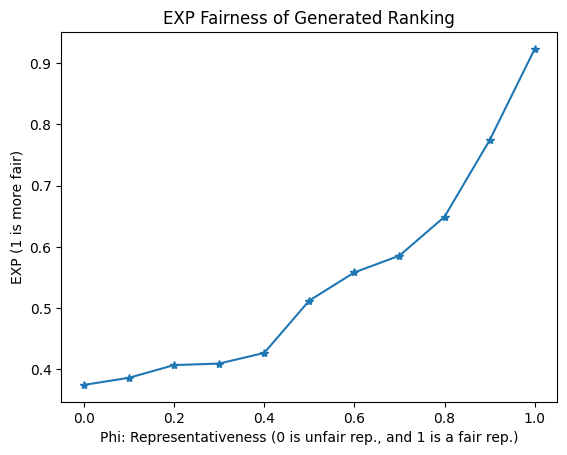

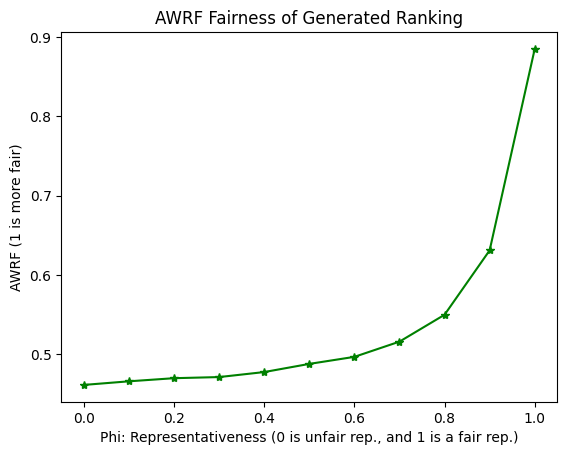

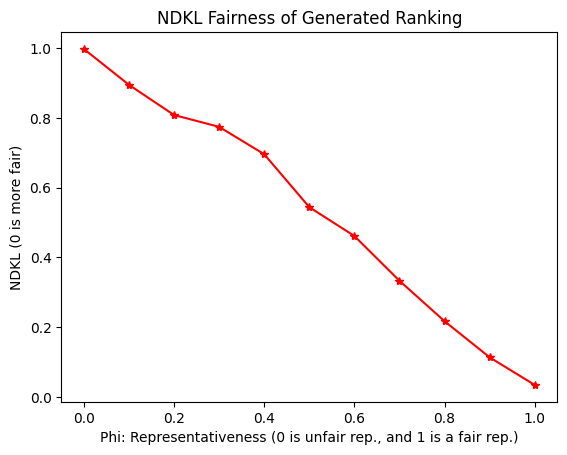

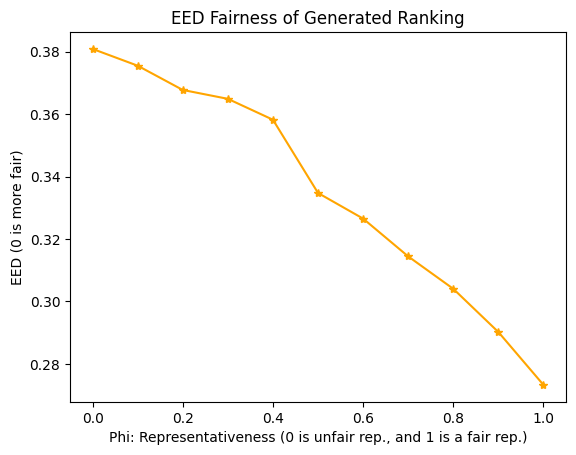

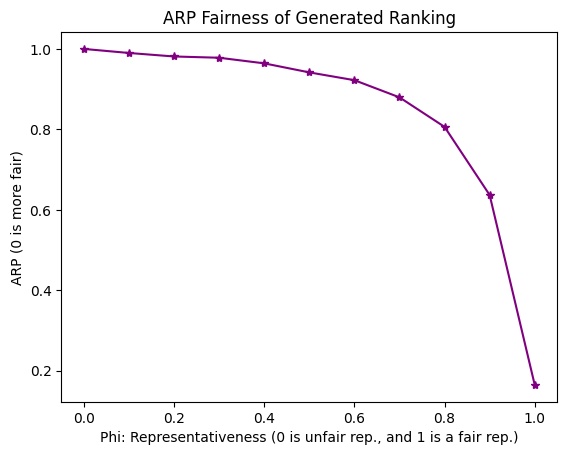

In [3]:
#ranking of 1000 items, with five groups of 40, 60, 200, 300, and 400 items each
group_proportions = np.asarray([.04, .06, .2, .3, .4]) #Array of group proportions
num_items = 1000
r_cnt = 1 #Generate 1 ranking
seed = 10 #For reproducability


# For plotting
phi_plot = []
ndkl_plot = []
er_plot = []
eed_plot = []
arp_plot = []
awrf_plot = []


for phi in [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]:
    ranking_df, item_group_dict = frt.RankTune.GenFromGroups(group_proportions, num_items, phi, r_cnt, seed)
    expdp, avg_exps = frt.EXP(ranking_df, item_group_dict, 'MinMaxRatio')
    ndkl = frt.NDKL(ranking_df, item_group_dict)
    eed, avg_exps = frt.EXP(ranking_df, item_group_dict, 'LTwo')
    arp, _ = frt.ARP(ranking_df, item_group_dict, 'MaxMinDiff')
    awrf, avg_attns = frt.AWRF(ranking_df, item_group_dict, 1/num_items, 'MinMaxRatio')
    phi_plot.append(phi)
    ndkl_plot.append(ndkl)
    er_plot.append(expdp)
    eed_plot.append(eed)
    arp_plot.append(arp)
    awrf_plot.append(awrf)


#plot EXP
xpoints = phi_plot
ypoints = er_plot
plt.ylabel("EXP (1 is more fair)")
plt.xlabel("Phi: Representativeness (0 is unfair rep., and 1 is a fair rep.)")
plt.title("EXP Fairness of Generated Ranking")
plt.plot(xpoints, ypoints, marker='*')
plt.show()

# plot AWRF
xpoints = phi_plot
ypoints = awrf_plot
plt.ylabel("AWRF (1 is more fair)")
plt.xlabel("Phi: Representativeness (0 is unfair rep., and 1 is a fair rep.)")
plt.title("AWRF Fairness of Generated Ranking")
plt.plot(xpoints, ypoints, marker='*', color='green')
plt.show()

# plot NDKL
xpoints = phi_plot
ypoints = ndkl_plot
plt.ylabel("NDKL (0 is more fair)")
plt.xlabel("Phi: Representativeness (0 is unfair rep., and 1 is a fair rep.)")
plt.title("NDKL Fairness of Generated Ranking")
plt.plot(xpoints, ypoints, marker='*', color='red')
plt.show()

#plot EE-D
xpoints = phi_plot
ypoints = eed_plot
plt.ylabel("EED (0 is more fair)")
plt.xlabel("Phi: Representativeness (0 is unfair rep., and 1 is a fair rep.)")
plt.title("EED Fairness of Generated Ranking")
plt.plot(xpoints, ypoints, marker='*', color = 'orange')
plt.show()

# plot ARP
xpoints = phi_plot
ypoints = arp_plot
plt.ylabel("ARP (0 is more fair)")
plt.xlabel("Phi: Representativeness (0 is unfair rep., and 1 is a fair rep.)")
plt.title("ARP Fairness of Generated Ranking")
plt.plot(xpoints, ypoints, marker='*', color='purple')
plt.show()

We can see that for the metrics that are more fair at 1 (EXP and AWRF) the fairness lines trend upward for generated rankings since RankTune generates increasingly fair rankings. Likewise, for metrics that are more fair at 0 (EED, NDKL, and ARP) the fairness lines trend down for generated rankings generates increasingly fair rankings.

## RankTune data generation from a specific set of items

RankTune can be used to generate ranking(s) from `item_group_dict`, a dictionary of items where the keys are each item's group by using the `GenFromItems()` function.

Here we are going to demonstrate the behavior of RankTune by showing how to generate rankings that are biased `phi = 0.1` (more unfair representation of groups) and `phi = 0.9` (fair representation of groups). We will also visually compare the results. As this is very small example smalle changes in  `phi` (i.e., `phi = 0.1` vs. `phi = 0.2`) may not produce different rankings.

In [4]:
#Generate a biased (phi = 0.1) ranking
item_group_dict = dict(Joe= "M",  David= "M", Bella= "W", Heidi= "W", Amy = "W", Jill= "W", Jane= "W", Dave= "M", Nancy= "W", Nick= "M")
r_cnt = 1 #Generate 1 ranking
seed = 10 #For reproducability
phi = 0.1

ranking_df_bias, item_group_dict_bias = frt.RankTune.GenFromItems(item_group_dict, phi, r_cnt, seed)

#Calculate EXP with a MinMaxRatio
EXP_minmax_bias, avg_exposures_minmax_bias = frt.Metrics.EXP(ranking_df_bias, item_group_dict_bias, 'MinMaxRatio')
print("Generated ranking: ", ranking_df)
print("EXP of generated ranking phi= 0.1: ", EXP_minmax_bias, "avg_exposures: ", avg_exposures_minmax_bias)

Generated ranking:         0
0    599
1    598
2    597
3    299
4    999
..   ...
995  104
996  103
997  102
998  101
999  100

[1000 rows x 1 columns]
EXP of generated ranking phi= 0.1:  0.5158099476966725 avg_exposures:  {'M': 0.6404015779112127, 'W': 0.33032550440724917}


We can see this a pretty unfair ranking and the last three ranked candidates in `ranking_df` belong to the women 'W'. Next, lets try adjusting `phi = 0.9` to more fairly represent groups.

In [5]:
#Generate a more fair representation (phi = 0.9) ranking
item_group_dict = dict(Joe= "M",  David= "M", Bella= "W", Heidi= "W", Amy = "W", Jill= "W", Jane= "W", Dave= "M", Nancy= "W", Nick= "M")
r_cnt = 1 #Generate 1 ranking
seed = 10 #For reproducability
phi = .9

ranking_df_mf, item_group_dict_mf = frt.RankTune.GenFromItems(item_group_dict, phi, r_cnt, seed)

#Calculate EXP with a MinMaxRatio
EXP_minmax_mf, avg_exposures_minmax_mf = frt.Metrics.EXP(ranking_df_mf, item_group_dict_mf, 'MinMaxRatio')
print("Generated ranking: ", ranking_df_mf)
print("EXP of generated ranking phi= 0.9: ", EXP_minmax_mf, "avg_exposures: ", avg_exposures_minmax_mf)

Generated ranking:         0
0  Nancy
1   Nick
2   Jane
3   Dave
4   Jill
5    Amy
6  Heidi
7  David
8  Bella
9    Joe
EXP of generated ranking phi= 0.9:  0.8685562537325334 avg_exposures:  {'M': 0.41653400368711685, 'W': 0.47957055388997977}


We can see the generated ranking is significantly more fair and the bottom three candidates of `ranking_df` are no longer all women 'W'.

## RankTune data generation along with relevance scores

Both `GenFromGroups()` and `GenFromItems()` contain sibling functions; respectively, `ScoredGenFromGroups()` and `ScoredGenFromItems()` that also generate relevance scores alongside the produced ranking(s). Scores are generated from either a normal or uniform distribution by setting the `score_dist` parameter to either `'normal'` or `'uniform'`.


### Scored data generation from provided group sizes
For generating from group proportions use ```ScoredGenFromGroups()``` as follows:

In [6]:
#Generate a biased (phi = 0.1) ranking of 1000 items, with four groups of 100, 200, 300, and 400 items each.
group_proportions = np.asarray([.1, .2, .3, .4]) #Array of group proportions
num_items = 1000 #1000 items to be in the generated ranking
phi = 0.1
r_cnt = 2 #Generate 2 rankings
seed = 11 #For reproducability
score_dist = "uniform"
ranking_df, item_group_dict, scores_df = frt.RankTune.ScoredGenFromGroups(group_proportions, num_items, phi, r_cnt, score_dist, seed)

#Calculate EXP with a MinMaxRatio
EXP_minmax, avg_exposures_minmax = frt.Metrics.EXP(ranking_df, item_group_dict, 'MinMaxRatio')
print("EXP of generated ranking: ", EXP_minmax, "avg_exposures: ", avg_exposures_minmax)

EXP of generated ranking:  0.5260937124841141 avg_exposures:  {0: 0.40009413984176495, 1: 0.2646006018963654, 2: 0.2301957567918553, 3: 0.21048701137249243}


We can see the produced rankings are unfair and we can view the first few scores.

In [7]:
scores_df.head(4)

,0,1
0,0.998037,0.998361
1,0.996481,0.998295
2,0.995828,0.998273
3,0.995127,0.997293


### Scored data generation from a specific set of items

For generating from existing items use ```ScoredGenFromItems()``` as follows:

In [8]:
#Generate a biased (phi = 0.1) ranking
item_group_dict = dict(Joe= "M",  David= "M", Bella= "W", Heidi= "W", Amy = "W", Jill= "W", Jane= "W", Dave= "M", Nancy= "W", Nick= "M")
r_cnt = 1 #Generate 1 ranking
seed = 10 #For reproducability
phi = 0.1
score_dist = "uniform"
ranking_df, item_group_dict, score_df = frt.RankTune.ScoredGenFromItems(item_group_dict, phi, r_cnt, score_dist,seed)

#Calculate EXP with a MinMaxRatio
EXP_minmax, avg_exposures_minmax = frt.Metrics.EXP(ranking_df, item_group_dict, 'MinMaxRatio')
print("Generated ranking: ", ranking_df)
print("Generated scores: ", score_df)
print("EXP of generated ranking: ", EXP_minmax, "avg_exposures: ", avg_exposures_minmax)

Generated ranking:         0
0   Nick
1   Dave
2  David
3    Joe
4  Nancy
5   Jane
6   Jill
7    Amy
8  Heidi
9  Bella
Generated scores:            0
0  0.771321
1  0.760531
2  0.748804
3  0.633648
4  0.498507
5  0.224797
6  0.198063
7  0.169111
8  0.088340
9  0.020752
EXP of generated ranking:  0.5158099476966725 avg_exposures:  {'M': 0.6404015779112127, 'W': 0.33032550440724917}


To learn more check out the [documentation](https://https://kcachel.github.io/FairRankTune/RankTune/).